<div class="usecase-title">Bird Habitat Analysis T1 2024</div>

<div class="usecase-authors"><b>Authored by: </b>Katrine Chan</div>

<div class="usecase-duration"><b>Duration:</b> 90 mins</div>

<div class="usecase-level-skill">
    <div class="usecase-level"><b>Level: </b>Intermediate</div>
    <div class="usecase-skill"><b>Pre-requisite Skills: </b>Python </div>
</div>

<div class="usecase-section-header"><i><b>Scenario</i></b></div>


As a member of the council, I am eager to explore bird habitats within Melbourne city.  Imagine a city without birds, bird habitats are not only a source of beauty and wonder but also a sign of a healty ecosystem, reflecting the quality of air, water and vegetation of a city.  A thorough analysis of bird habitats will enable us to identify critical habitats and biodiverstiy hotspots within Melbourne, guiding conservation priorities and land management decisions.  This investigation aligns closely with the mission to prioritise the environment and biodiversity in the City of Melbourne. Through this analysis, I aim to discover:

* The types of birds commonly found in the City of Melbourne
* How changes in vegetation may influence bird sightings/activities
* Develop a habitat suitability models using machien learning techniuqes based on environmental variables such as vegetation cover 


<div class="usecase-section-header"><i><b>What this use case will teach you</i></b></div>

At the end of this use case you will:
* Have gained an understanding of using APIs
* Have learned how to fetch datasets using APIs
* Become familiar with performing data pre-processing
* Learned how to visualize real-life data using appropriate visualisation tools
* Learned how to work with more than one dataset
* Learned what a habitat preference modelling is and how to perform one

<div class="usecase-section-header"><i><b>Introduction</i></b></div>

To complete our bird habitat analysis, two datasets will be used.  These datasets will include below:

* Bird survey result for areas in the city of Melbourne in February and March 2018 - 
The bird survey contains data from multiple river and wetland sites in Melbourne. Surveys were conducted by Ecology Australia during February and March 2018, recording species richness and numbers. 
* Tree canopies public realm 2018 (Urban Forest) - 
Tree canopy within City of Melbourne mapped using 2018 aerial photos and LiDAR. The canopy polygons represent actual tree canopy extents on public property (land managed by the City of Melbourne) across the city. 




<div style="color: blue;"> Self Notes: 


- Most common bird species, habitat preferences in terms of trees, analysing migration patterns

- Speciies observed location, date, etc

- vegetation type, land use? 

- data cleansing, missingn data, formatting 

- start with EDA using existing data on bird habitat and then forestation. 

- merging bird watch data with forestation data 

- visualisation uisng maps, histograms and plots 

- predictive modelling to help forecast bird distribution based on environmental factors </div>

# **Part 1  - Import modules**

In [135]:
# importing required modules

import requests
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt

import folium

# **Part 2  - Fetching Bird Data from Melbourne Open Data**



In [136]:

# https://data.melbourne.vic.gov.au/explore/dataset/bird-survey-results-for-areas-in-the-city-of-melbourne-february-and-march-2018/information/
dataset_id = 'bird-survey-results-for-areas-in-the-city-of-melbourne-february-and-march-2018'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    birds_df = pd.read_csv(StringIO(url_content), delimiter= ';')
    print(birds_df.sample(10, random_state = 999))
else: 
    print(f'Request failed with status code{response.status_code}')

    sighting_date                   common_name  \
194    2018-02-28        New Holland Honeyeater   
490    2018-02-15       White-plumed Honeyeater   
253    2018-02-15               Brown Thornbill   
279    2018-02-15  Phylidonyris novaehollandiae   
94     2018-02-15                 Chestnut Teal   
151    2018-02-15            Australasian Grebe   
233    2018-02-28                   Magpie-lark   
124    2018-03-19              Rainbow Lorikeet   
457    2018-02-15                   Silver Gull   
211    2018-02-28                Willie Wagtail   

                     scientific_name  sighting_count  \
194     Phylidonyris novaehollandiae               0   
490       Lichenostomus penicillatus              56   
253                Acanthiza pusilla               0   
279           New Holland Honeyeater               0   
94                     Anas castanea              29   
151      Tachybaptus novaehollandiae               4   
233              Grallina cyanoleuca          

In [137]:
# printing out the number of observation in birds dataset 
print("Number of observation in the birds_df is:", len(birds_df))

# printing out the first 10 observations in dataframe
birds_df.head(10)

Number of observation in the birds_df is: 498


,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc,lat2,lon2,loc2_desc,site_name,location_2,location_1
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
5,2018-03-06,Common Blackbird,Turdus merula,1,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
6,2018-03-19,Common Blackbird,Turdus merula,3,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
7,2018-02-15,Common Myna,Acridotheres tristis,36,10998,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
8,2018-02-15,Common Starling,Sturnus vulgaris,3,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"
9,2018-03-19,Common Starling,Sturnus vulgaris,0,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...,NaN,NaN,NaN,Dynon Road Tidal Canal Wildlife Sanctuary,NaN,"-37.8038, 144.9118"


# **Part 3  - Pre-processing Bird Data Melbourne Open Data**

In [138]:
# Looking at the data above, there are data which can be dropped 
# these includes lat2 lon2 loc2_desc site_name location_2 location_1
# these convey the same messages as other existing data and therefore 
# will be dropped

columns_to_drop = ['lat2', 'lon2', 'loc2_desc', 'site_name', 'location_2', 'location_1']
birds_df = birds_df.drop(columns=columns_to_drop)


In [139]:
birds_df.head(10)

,sighting_date,common_name,scientific_name,sighting_count,victorian_biodiversity_atlas_code,lat,lon,loc1_desc
0,2018-03-12,Australian Magpie,Gymnorhina tibicen,2,10705,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
1,2018-02-28,Australian White Ibis,Threskiornis molucca,141,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
2,2018-03-12,Australian White Ibis,Threskiornis molucca,83,10179,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
3,2018-02-28,Chestnut Teal,Anas castanea,7,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
4,2018-03-12,Chestnut Teal,Anas castanea,5,10210,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
5,2018-03-06,Common Blackbird,Turdus merula,1,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
6,2018-03-19,Common Blackbird,Turdus merula,3,10991,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
7,2018-02-15,Common Myna,Acridotheres tristis,36,10998,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
8,2018-02-15,Common Starling,Sturnus vulgaris,3,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...
9,2018-03-19,Common Starling,Sturnus vulgaris,0,10999,-37.8038,144.9118,Dynon Road Tidal Canal Wildlife Sanctuary Down...


In [140]:
# Checking NA is the birds_df 

missing_values = birds_df.isna().sum()
print(missing_values)


sighting_date                        0
common_name                          0
scientific_name                      0
sighting_count                       0
victorian_biodiversity_atlas_code    0
lat                                  0
lon                                  0
loc1_desc                            0
dtype: int64


# **Part 4- EDA on birds_df**


In [141]:
# Finding the date set of the dataset
earliest_date = birds_df['sighting_date'].min()
latest_date = birds_df['sighting_date'].max()

# Display the date range
print("Date range for the data:")
print("Earliest date:", earliest_date)
print("Latest date:", latest_date)


Date range for the data:
Earliest date: 2018-02-15
Latest date: 2018-03-19


In [142]:
# counting number of unique values in the column "common_name"
num_unique = birds_df['common_name'].nunique()

# Display the number of unique values
print("Number of unique birds sighted:", num_unique)

# Display the unique values
unique_values = birds_df['common_name'].unique()
print("Unique common bird names:")
print(unique_values)


Number of unique birds sighted: 50
Unique common bird names:
['Australian Magpie' 'Australian White Ibis' 'Chestnut Teal'
 'Common Blackbird' 'Common Myna' 'Common Starling' 'Dusky Moorhen'
 'Eastern Great Egret' 'Little Pied Cormorant' 'Little Raven'
 'Little Wattlebird' 'Magpie-lark' 'Musk Lorikeet' 'Nankeen Night Heron'
 'New Holland Honeyeater' 'Pacific Black Duck' 'Rainbow Lorikeet'
 'Red Wattlebird' 'Rock Dove' 'Spotted Turtle-Dove' 'Superb Fairy-wren'
 'White-plumed Honeyeater' 'Willie Wagtail' 'Clamorous Reed Warbler'
 'House Sparrow' 'Noisy Miner' 'White-faced Heron' 'Black Swan'
 'Brown Thornbill' 'Darter' 'Eurasian Coot' 'Grey Teal'
 'Hoary-headed Grebe' 'Little Black Cormorant'
 'Phylidonyris novaehollandiae' 'Silver Gull' 'Welcome Swallow'
 'White-browed Scrubwren' 'Hardhead' 'Australasian Grebe' 'Bell Miner'
 'Tree Martin' 'Great Cormorant' 'Spotted Pardalote' 'Crested Pigeon'
 'Crested Tern' 'European Greenfinch' 'Australian Wood Duck'
 'Masked Lapwing' 'Red-rumped Parro

In [143]:
# calculating the sum of the sight_count of each unique group
sight_count_totals = birds_df.groupby('common_name')['sighting_count'].sum()

# Displaying the total of each bird
print("Total sight count for each unique type of birds:")
print(sight_count_totals)


Total sight count for each unique type of birds:
common_name
Australasian Grebe                10
Australian Magpie                 20
Australian White Ibis            471
Australian Wood Duck               1
Bell Miner                         8
Black Swan                         6
Brown Thornbill                    6
Chestnut Teal                    364
Clamorous Reed Warbler            11
Common Blackbird                  46
Common Myna                      539
Common Starling                  141
Crested Pigeon                    58
Crested Tern                       1
Darter                             2
Dusky Moorhen                     21
Eastern Great Egret                4
Eurasian Coot                      9
European Greenfinch                1
Great Cormorant                   22
Grey Teal                         69
Hardhead                           7
Hoary-headed Grebe                 1
House Sparrow                    420
Little Black Cormorant            65
Little Pied Co

In [144]:
# sort the sight count from largest to smallest
sorted_sight_count_totals = sight_count_totals.sort_values(ascending=False)

# Printing this sorted list
print("Total sight count for each unique value of 'common_name' (sorted by largest to smallest):")
print(sorted_sight_count_totals)


Total sight count for each unique value of 'common_name' (sorted by largest to smallest):
common_name
Silver Gull                     1311
Rock Dove                       1308
Common Myna                      539
Australian White Ibis            471
House Sparrow                    420
White-plumed Honeyeater          370
Chestnut Teal                    364
Spotted Turtle-Dove              317
Little Raven                     165
Common Starling                  141
Little Wattlebird                118
Red Wattlebird                   104
Superb Fairy-wren                101
Pacific Black Duck                92
Magpie-lark                       90
Rainbow Lorikeet                  88
Little Pied Cormorant             77
Grey Teal                         69
New Holland Honeyeater            67
Little Black Cormorant            65
Crested Pigeon                    58
Willie Wagtail                    48
Common Blackbird                  46
Musk Lorikeet                     38
Noisy Mine

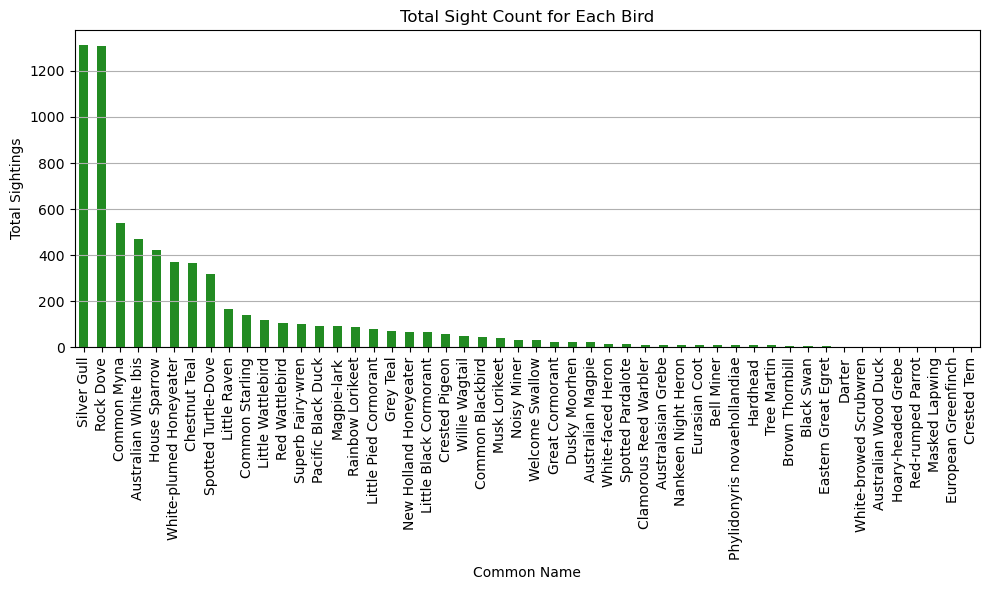

In [145]:

# Plotting the sightings from largest to smallest
plt.figure(figsize=(10, 6))
sorted_sight_count_totals.plot(kind='bar', color='forestgreen')
plt.title('Total Sight Count for Each Bird')
plt.xlabel('Common Name')
plt.ylabel('Total Sightings')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for y-axis
plt.tight_layout()
plt.show()


In [146]:
# Create a map centered at a specific location
my_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=13)  # Melbourne

# Group the DataFrame by latitude and longitude, and sum up the sighting counts
grouped_data = birds_df.groupby(['lat', 'lon'])['sighting_count'].sum().reset_index()

# Add markers for each sighting location with the total bird counts displayed in popups
for index, row in grouped_data.iterrows():
    total_bird_counts = row['sighting_count']
    popup_text = f'<div style="font-size: 14px;">Total Bird Count: {total_bird_counts}</div>'
    folium.Marker([row['lat'], row['lon']], popup=popup_text).add_to(my_map)

# Display the map
my_map


# **Part  - Fetching Urban Vegetation Data**


In [147]:
# https://data.melbourne.vic.gov.au/explore/dataset/tree-canopies-public-realm-2018-urban-forest/information/
dataset_id = 'tree-canopies-public-realm-2018-urban-forest'

base_url = 'https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/'
# apikey = ''
dataset_id = dataset_id
format = 'csv'

url = f'{base_url}{dataset_id}/exports/{format}'
params = {
    'select': '*',
    'limit': -1, # all records
    'lang': 'en',
    'timezone': 'UTC'
    #'api_key': apikey
}

#GET request 
response = requests.get(url, params = params)

if response.status_code == 200:
    # StringIO to read the CSV data
    url_content = response.content.decode('utf-8')
    canopies_df = pd.read_csv(StringIO(url_content), delimiter= ';')
    print(canopies_df.sample(10, random_state = 999))
else: 
    print(f'Request failed with status code{response.status_code}')

                                  geo_point_2d  \
4993      -37.8145751551352, 144.9805895596095   
31513  -37.811588080384624, 144.99040585561755   
18171   -37.78616959177923, 144.95382302087543   
7396    -37.79089429044354, 144.92768549788764   
31227    -37.82301993173705, 144.9416856152476   
20428   -37.82674112740275, 144.97512551907522   
4737     -37.81591180158867, 144.9744943079432   
4481    -37.817795135955464, 144.9726307355313   
29950    -37.83716631249747, 144.9779636716906   
20014     -37.8110065481589, 144.9357091714089   

                                               geo_shape  objectid  \
4993   {"coordinates": [[[[144.98056781409096, -37.81...      9397   
31513  {"coordinates": [[[[144.99040644351783, -37.81...     11175   
18171  {"coordinates": [[[[144.95382083324688, -37.78...     28617   
7396   {"coordinates": [[[[144.92767708810658, -37.79...     25380   
31227  {"coordinates": [[[[144.94168228689136, -37.82...      5436   
20428  {"coordinates": [[[[14

In [148]:
print(len(canopies_df))
canopies_df.head(10)

32787


,geo_point_2d,geo_shape,objectid,shape_leng,shape_area
0,"-37.830322412403724, 144.97213935761758","{""coordinates"": [[[[144.97214257837427, -37.83...",2481,4.493090,1.442985
1,"-37.83054865062538, 144.98556418282442","{""coordinates"": [[[[144.9855699565163, -37.830...",2482,3.391400,0.712674
2,"-37.82906956280423, 144.90107469398373","{""coordinates"": [[[[144.90108034740666, -37.82...",2485,6.634954,2.688600
3,"-37.83031424588097, 144.97262746960845","{""coordinates"": [[[[144.9726355209651, -37.830...",2488,7.435344,4.076985
4,"-37.829089452084844, 144.90114851316798","{""coordinates"": [[[[144.90109653917588, -37.82...",2489,41.617513,76.335805
5,"-37.82924133766255, 144.911840115982","{""coordinates"": [[[[144.91184029760942, -37.82...",2492,5.908336,2.523445
6,"-37.8302912220846, 144.97194931124594","{""coordinates"": [[[[144.97195836218296, -37.83...",2493,6.053743,2.716028
7,"-37.82903633008432, 144.90118362097755","{""coordinates"": [[[[144.9011829289174, -37.829...",2500,8.252982,5.109619
8,"-37.83015879041279, 144.96493846617437","{""coordinates"": [[[[144.96495203493674, -37.83...",2501,13.313659,11.922225
9,"-37.829099150766005, 144.90710286371822","{""coordinates"": [[[[144.90710659137636, -37.82...",2509,1.775070,0.051126


# **Part  - Pre-processing Urban Vegetation Data**

# **References**
